In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap ='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap ='gray')

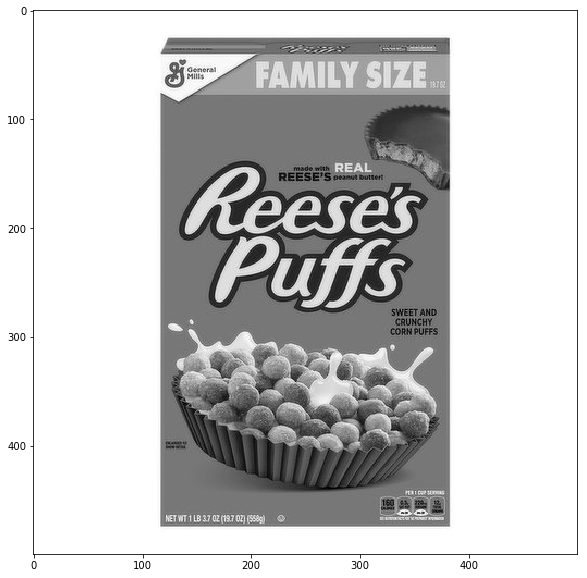

In [3]:
reeses = cv2.imread('rteesespuff.jpeg',0)
display(reeses)

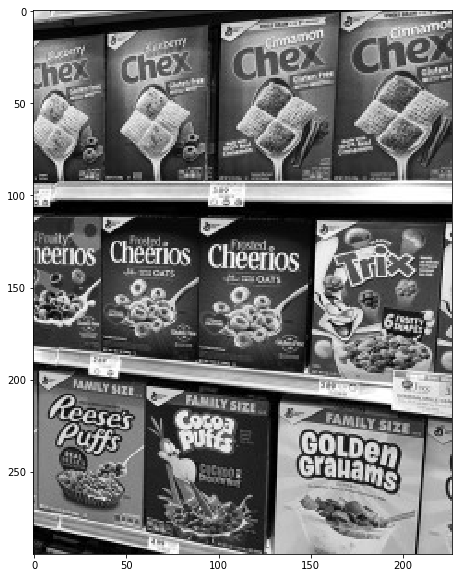

In [4]:
cereals = cv2.imread('many_cereals.jpg' , 0)
display(cereals)

In [5]:
orb = cv2.ORB_create()

In [6]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [7]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)

In [8]:
matches = bf.match(des1,des2)

In [9]:
single_match = matches[0]

In [10]:
single_match.distance

47.0

In [11]:
matches = sorted(matches,key = lambda x:x.distance)

In [12]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags = 2)

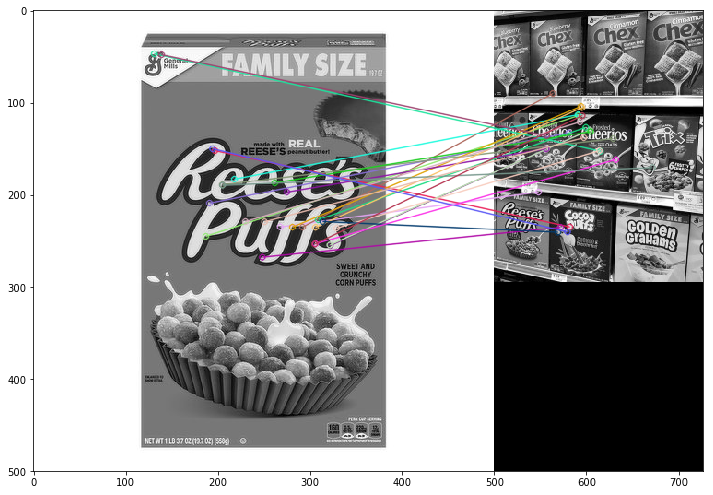

In [13]:
display(reeses_matches)

In [14]:
sift = cv2.xfeatures2d.SIFT_create()

In [15]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [16]:
bf =  cv2.BFMatcher()

In [17]:
matches = bf.knnMatch(des1,des2,k=2)

In [18]:
good = []

for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [19]:
len(good)

21

In [20]:
len(matches)

727

In [21]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags = 2)

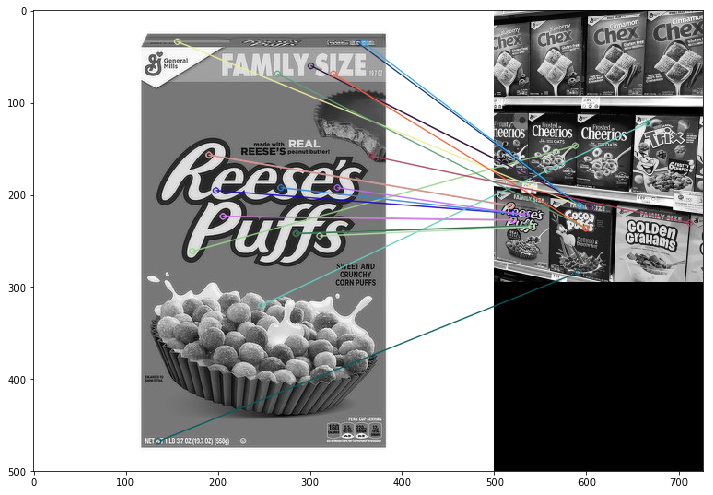

In [22]:
display(sift_matches)

In [23]:
sift = cv2.xfeatures2d.SIFT_create()

In [24]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [25]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE,trees = 5)
search_params = dict(checks = 50)

In [26]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [27]:
matches = flann.knnMatch(des1,des2,k=2)

In [28]:
matchesMask = [[0,0] for i in range (len(matches))]

In [29]:
# matches_mask

In [30]:


for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]
     

In [31]:
draw_params = dict(matchColor =(0,255,0),singlePointColor =(255,0,0),matchesMask = matchesMask,flags = 0)

In [32]:
####copy####

# Suppose `good` contains the matches you want to draw
#matchesMask = [[1, 0] for i in range(len(good))]  # Or any mask according to your needs
#draw_params = dict(matchColor=(0, 255, 0),  # Color for matches
                   #singlePointColor=(255, 0, 0),
                   #matchesMask=matchesMask,  # Make sure matchesMask is the same size as `good`
                   #flags=0)

#flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, **draw_params)


In [33]:
 flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params) 

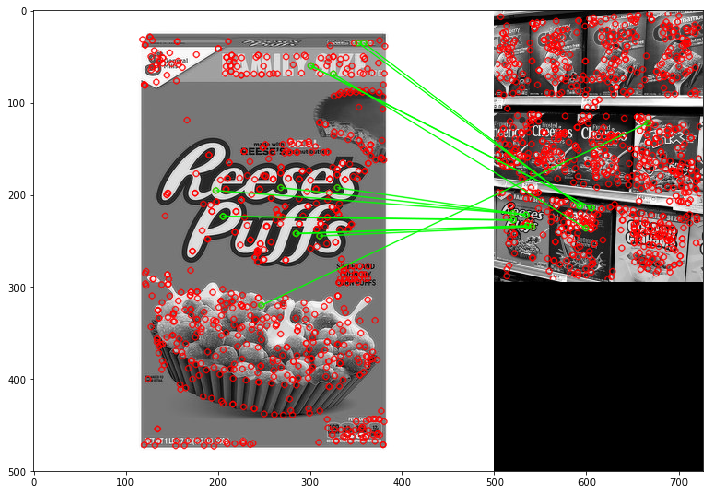

In [34]:
display(flann_matches)